Given the volatility of cryptocurrencies, this research seeks to understand if swing trade XRP* will be possible by observing trends of long term as well as short term trade prices of XRP. Then use these characteristics to predict when to buy and sell XRP using classification techniques. (Since the end results are specific actions such as "Buy", Classification techniques will be used rather than Regression)

The data of XRP trade history (of 5-minute intervals) will be taken from the exchange:
https://poloniex.com


* what is XRP: https://en.wikipedia.org/wiki/Ripple_(payment_protocol)

## Import things 

In [2]:
import numpy as np

In [3]:
#from TFANN import ANNR
import matplotlib.pyplot as mpl
#from sklearn.preprocessing import scale

In [4]:
import matplotlib.pyplot as plt

In [5]:
import datetime as dt

In [6]:
from datetime import datetime

In [7]:
import numpy as np
import os
import pandas as pd
import urllib.request
     

In [8]:
from IPython.display import clear_output


In [9]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'


## Initialisation

In [10]:
# valid period : 300, 900, 1800, 7200, 14400, 86400 :seconds
 
def GetCurDF_5min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=300'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df



def GetCurDF_30min(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=1800".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=1800'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df



def GetCurDF_2Hours(cur,start):
    '''
    cur:    3 letter abbreviation for cryptocurrency (BTC, LTC, etc)
    fp:     File path (to save price data to CSV)
    '''
    start = start 
    end = start + 7776000 #90 days is safe
    print("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200".format(cur, start,end))
    openUrl = urllib.request.urlopen("https://poloniex.com/public?command=returnChartData&currencyPair=USDT_{0}&start={1}&end={2}&period=7200'".format(cur, start,end))
    r = openUrl.read()
    openUrl.close()
    df = pd.read_json(r.decode())
    df['date'] = df['date'].astype(np.int64) // 1000000000   ## datetime.fromtimestamp(1424138400) to convert back
    return df


### Initialisation

In [11]:
# for coin in ['LSK','ETH','ETC','STR','XMR','XRP','LTC','ATOM','XMR','ZEC','BAT','SNT','BTC']:
    
for coin in ['XRP']:
    clear_output()

    starting_time_all = 1420070400
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
        for tables in [df_5min]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])

        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min]
        
        
    for li in to_save_list:

        MyFile=open('{0}_5min_Freq.txt'.format(coin),'w')

        for element in li:
            MyFile.write(element)
            MyFile.write('\n')
        MyFile.close()
        

https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1420070400&end=1427846400&period=300
XRP 1427846400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1427846400&end=1435622400&period=300
XRP 1435622400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1435622400&end=1443398400&period=300
XRP 1443398400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1443398400&end=1451174400&period=300
XRP 1451174400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1451174400&end=1458950400&period=300
XRP 1458950400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1458950400&end=1466726400&period=300
XRP 1466726400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1466726400&end=1474502400&period=300
XRP 1474502400
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&st

## Updating as wish

In [135]:
for coin in ['XRP']:
    clear_output()

    starting_time_all = 1564702500 # starting on aug 2nd 2019 due to refresh data
    
    list_5min = []
    list_30min = []
    list_2H = []

    while starting_time_all < datetime.timestamp(datetime.now()):
        
        timestamp_start = str(datetime.fromtimestamp(starting_time_all)).replace(':','').replace('-','').replace(' ','')

        df_5min  =  [GetCurDF_5min(coin,starting_time_all), '{0}_5min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
#         df_30min =  [GetCurDF_30min(coin,starting_time_all), '{0}_30min_Freq_starting_at_{1}'.format(coin,timestamp_start)]
        
#         df_2Hour =  [GetCurDF_2Hours(coin,starting_time_all), '{0}_2H_Freq_starting_at_{1}'.format(coin,timestamp_start)]

        
        for tables in [df_5min]:#, df_30min , df_2Hour]:
            if '_5min_' in tables[1]:
                tables[0].to_csv('./Coin_Data_5min/{0}.csv'.format(tables[1]))
                list_5min.append(tables[1])
                
#             elif '_30min_' in tables[1]:
#                 tables[0].to_csv('Coin_Data_30min/{0}.csv'.format(tables[1]))
#                 list_30min.append(tables[1])
#             else:
#                 tables[0].to_csv('Coin_Data_2H/{0}.csv'.format(tables[1]))
#                 list_2H.append(tables[1])
                
        starting_time_all += 7776000
        
        
        print(coin, starting_time_all)
        
        
        
    to_save_list = [list_5min]#, list_30min, list_2H]
        
        
    for li in to_save_list:

        if '_5min_' in li[0]:
            
            list_5min = []
            
            read_MyFile=open('{0}_5min_Freq.txt'.format(coin),'r')
            
            for i in read_MyFile:
                list_5min.append(int(i.split('_')[-1]))
                
            read_MyFile.close()
            
            MyFile=open('{0}_5min_Freq.txt'.format(coin),'a')

#         elif '_30min_' in li[0]:
#             MyFile=open('{0}_30min_Freq.txt'.format(coin),'w')

#         else:
#             MyFile=open('{0}_2H_Freq.txt'.format(coin),'w')

            for element in li:
                if int(element.split('_')[-1]) not in list_5min:
                    MyFile.write(element)
                    MyFile.write('\n')
            MyFile.close()


https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1564702500&end=1572478500&period=300
XRP 1572478500
https://poloniex.com/public?command=returnChartData&currencyPair=USDT_XRP&start=1572478500&end=1580254500&period=300
XRP 1580254500


### Get 5min XRP data

In [377]:
XRP = []
for myf in open('./XRP_5min_Freq.txt'):
    XRP.append(myf.replace('\n',''))

In [378]:
XRP_Data = []
for E in XRP:
    XRP_Temp = pd.read_csv('./Coin_Data_5min/{0}.csv'.format(E))
    XRP_Data.append(XRP_Temp)

In [379]:
XRP_Data = pd.concat(XRP_Data)

In [380]:
XRP_Data = XRP_Data.drop(columns = ['Unnamed: 0']).drop_duplicates()

In [381]:
XRP_Data['datetime_real'] = XRP_Data['date'].apply(lambda x: datetime.fromtimestamp(x))

In [382]:
# XRP_Data = XRP_Data[XRP_Data['date'] != 0]

# XRP_Data = XRP_Data[XRP_Data['volume'] != 0]

In [383]:
# Hour = 2
# XRP_Data['2H_RA_on_Close'.format(Hour)] = XRP_Data['close'].rolling( Hour*12).mean()

# XRP_Data['2H_RA_on_Close'] = XRP_Data['2H_RA_on_Close'].shift(1)

# XRP_Data['high_percent_dif'] = (XRP_Data['high']-XRP_Data['2H_RA_on_Close'])/XRP_Data['2H_RA_on_Close'] 

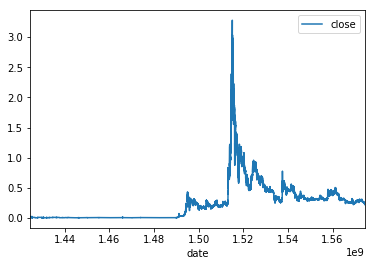

In [384]:
XRP_Data.set_index('date')[['close']].plot()

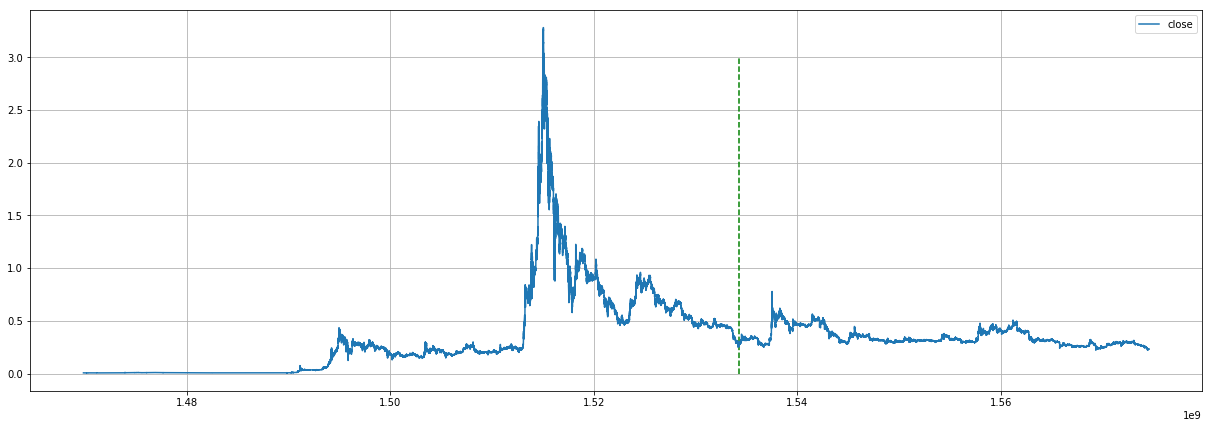

In [385]:
ploting_breakdown = XRP_Data[150000:]

plt.figure(figsize= (21,7))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close']

tran_x = ploting_breakdown['date']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 1)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t


# for key, val in time_section.items():
#     xrp_part = ploting_breakdown[ key :   key + val ]
#     xrp_y = xrp_part['close']
#     xrp_date = xrp_part['date']

#     plt.plot(xrp_date, xrp_y, alpha  = 1, label = '{0} - {1}'.format(xrp_part['datetime_real'].min().split(' ')[0],
#                                                                      xrp_part['datetime_real'].max().split(' ')[0]))

    
#     print(xrp_part['date'].min(), xrp_part['date'].max() )
plt.vlines(1534287600, 0, 3, alpha = 1, color = 'g',linestyle = 'dashed')
    
plt.legend()
plt.grid()

In [386]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2018-08-15 00:00:00']

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
17844,0.26425,1534287600,0.26425,0.26425,0.26425,0.0,0.0,0.26425,2018-08-15


In [387]:
ploting_breakdown[ploting_breakdown['datetime_real'] == '2019-08-15 00:00:00']

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real
19284,0.269059,1565823600,0.269059,0.269059,0.269059,0.0,0.0,0.269059,2019-08-15


In [388]:
XRP_Data_backUp = XRP_Data.copy()

In [389]:
XRP_for_training =XRP_Data[(XRP_Data['date'] >= 1534287600) &
                           (XRP_Data['date'] <1565823600)].copy()

In [390]:
XRP_for_testing =XRP_Data[(XRP_Data['date'] >= 1565823600)].copy()

## Analysis on training datasets

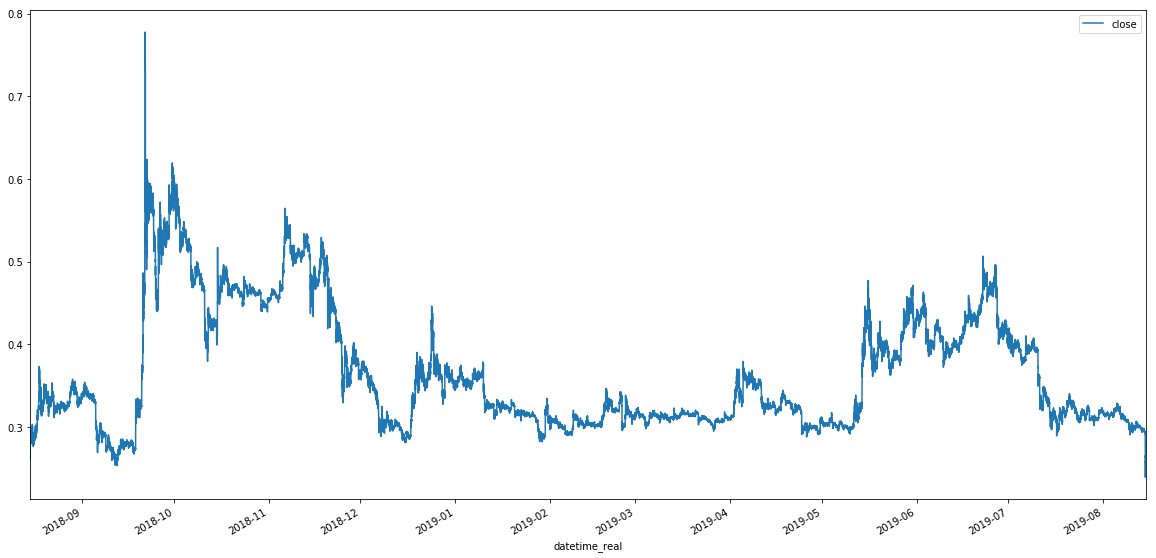

In [391]:
XRP_for_training.set_index('datetime_real')[['close']].plot(figsize = (20,10))

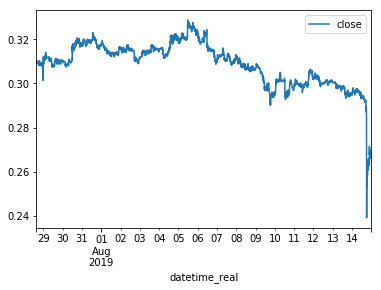

In [392]:
XRP_for_training.tail(5000).set_index('datetime_real')[['close']].plot()

In [393]:
section_period = {  '5min': 1,
                    '10min': 2,
                    '15min': 3,
                    '20min': 4,
                    '1H': 12,
                    '2H': 24,
                    '4H': 48,
                    '12H': 144,
                    '24H': 288,
                    '5D': 1440,
                    '10D': 2880}

In [394]:
for k,v in section_period.items():
    XRP_for_training['{0}_RA_on_Close'.format(k)] = XRP_for_training['close'].rolling(v).mean()

In [395]:
compare_sequence = {}

In [396]:
for col_1 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [397]:
for k, val in compare_sequence.items():
    XRP_for_training[k] = (XRP_for_training[val[0]] - XRP_for_training[val[1]])/XRP_for_training[val[1]] 
#     print(k, val[0], val[1])

In [398]:
for col in [d for d in XRP_for_training.columns if '_RA_on_Close' in d]:
    XRP_for_training[col] = XRP_for_training[col].shift(1)
    
    XRP_for_training['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_training['close']-XRP_for_training[col])/XRP_for_training[col] 

In [399]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_training['look_back_{}'.format(k)] = XRP_for_training['close'].shift(v)   # i.e. 20min ago, this is what the close price is
    XRP_for_training['look_forward_{}'.format(k)] = XRP_for_training['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_training['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_training['close'] - XRP_for_training['look_back_{}'.format(k)])/(5*v)
    XRP_for_training['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_training['look_forward_{}'.format(k)] - XRP_for_training['close'])/(5*v)

5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880
5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880


net_{net_percent}_percent is the net_percent + minimum for profit, 

i.e. net_01_percent = 0.1% + 0.003 = 0.004

In [400]:
net_01_percent = 0.004
net_02_percent = 0.005

In [401]:
to_20min = {'20min' : 1,
            '1H'    : 3,
            '2H'    : 6,
            '4H'    : 12,
            '12H'   : 36,
            '24H'   : 72,
            '5D'    : 360,
            '10D'   : 720  }

In [402]:
Buy_in_decision = pd.DataFrame((XRP_for_training[['date'] + [d for d in XRP_for_training.columns if '_forward_Percent_' in d]].set_index('date') > 0.005).any(axis =1 )).rename(columns ={0: 'Buy_In'})

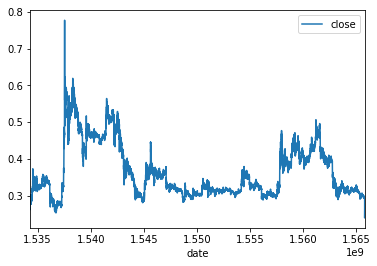

In [403]:
XRP_for_training[['close','date']].set_index('date').plot()

In [404]:
within_target_02_profit = XRP_for_training.merge(Buy_in_decision.reset_index(), on ='date', how='left').dropna()

In [405]:
properties = [
#     'close',
#  'date',
#  'high',
#  'low',
#  'open',
 'quoteVolume',
 'volume',
#  'weightedAverage',
#  'datetime_real',
 '5min_close_percent_dif',
 '10min_close_percent_dif',
 '15min_close_percent_dif',
 '20min_close_percent_dif',
 '1H_close_percent_dif',
 '2H_close_percent_dif',
 '4H_close_percent_dif',
 '12H_close_percent_dif',
 '24H_close_percent_dif',
 '5D_close_percent_dif',
 '10D_close_percent_dif',
 'calculate_look_back_Percent_5min',
 'calculate_look_back_Percent_10min',
 'calculate_look_back_Percent_15min',
 'calculate_look_back_Percent_20min',
 'calculate_look_back_Percent_1H',
 'calculate_look_back_Percent_2H',
 'calculate_look_back_Percent_4H',
 'calculate_look_back_Percent_12H',
 'calculate_look_back_Percent_24H',
 'calculate_look_back_Percent_5D',
 'calculate_look_back_Percent_10D',
 '5min_minus_10min',
 '5min_minus_15min',
 '5min_minus_20min',
 '5min_minus_1H',
 '5min_minus_2H',
 '5min_minus_4H',
 '5min_minus_12H',
 '5min_minus_24H',
 '5min_minus_5D',
 '5min_minus_10D',
 '10min_minus_15min',
 '10min_minus_20min',
 '10min_minus_1H',
 '10min_minus_2H',
 '10min_minus_4H',
 '10min_minus_12H',
 '10min_minus_24H',
 '10min_minus_5D',
 '10min_minus_10D',
 '15min_minus_20min',
 '15min_minus_1H',
 '15min_minus_2H',
 '15min_minus_4H',
 '15min_minus_12H',
 '15min_minus_24H',
 '15min_minus_5D',
 '15min_minus_10D',
 '20min_minus_1H',
 '20min_minus_2H',
 '20min_minus_4H',
 '20min_minus_12H',
 '20min_minus_24H',
 '20min_minus_5D',
 '20min_minus_10D',
 '1H_minus_2H',
 '1H_minus_4H',
 '1H_minus_12H',
 '1H_minus_24H',
 '1H_minus_5D',
 '1H_minus_10D',
 '2H_minus_4H',
 '2H_minus_12H',
 '2H_minus_24H',
 '2H_minus_5D',
 '2H_minus_10D',
 '4H_minus_12H',
 '4H_minus_24H',
 '4H_minus_5D',
 '4H_minus_10D',
 '12H_minus_24H',
 '12H_minus_5D',
 '12H_minus_10D',
 '24H_minus_5D',
 '24H_minus_10D',
 '5D_minus_10D']

## split into target and properties

In [406]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [407]:
from sklearn.externals.six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import os

import pydot

In [408]:
from collections import Counter

In [409]:
import math

In [410]:
target_y = within_target_02_profit[['Buy_In']].copy()

In [411]:
train_x = within_target_02_profit[properties].copy()

In [412]:
train_x.columns

Index(['quoteVolume', 'volume', '5min_close_percent_dif',
       '10min_close_percent_dif', '15min_close_percent_dif',
       '20min_close_percent_dif', '1H_close_percent_dif',
       '2H_close_percent_dif', '4H_close_percent_dif', '12H_close_percent_dif',
       '24H_close_percent_dif', '5D_close_percent_dif',
       '10D_close_percent_dif', 'calculate_look_back_Percent_5min',
       'calculate_look_back_Percent_10min',
       'calculate_look_back_Percent_15min',
       'calculate_look_back_Percent_20min', 'calculate_look_back_Percent_1H',
       'calculate_look_back_Percent_2H', 'calculate_look_back_Percent_4H',
       'calculate_look_back_Percent_12H', 'calculate_look_back_Percent_24H',
       'calculate_look_back_Percent_5D', 'calculate_look_back_Percent_10D',
       '5min_minus_10min', '5min_minus_15min', '5min_minus_20min',
       '5min_minus_1H', '5min_minus_2H', '5min_minus_4H', '5min_minus_12H',
       '5min_minus_24H', '5min_minus_5D', '5min_minus_10D',
       '10min_minus_15

In [413]:
target_y.columns

Index(['Buy_In'], dtype='object')

In [414]:
# X_train, X_test, y_train, y_test = train_test_split(train_x, target_y, test_size=0.33, random_state=324)

In [415]:
X_train_order = train_x.iloc[:-math.floor(len(train_x)*0.2)]

In [416]:
y_train_order = target_y.iloc[:-math.floor(len(target_y)*0.2)]

In [417]:
X_test_order = train_x.iloc[-math.floor(len(train_x)*0.2):]

In [418]:
y_test_order = target_y.iloc[-math.floor(len(target_y)*0.2):]

In [419]:
buy_in_decision_classifier = DecisionTreeClassifier(max_leaf_nodes=8, random_state=0)
buy_in_decision_classifier.fit(X_train_order, y_train_order)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=8, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [420]:
predictions = buy_in_decision_classifier.predict(X_test_order)

In [421]:
accuracy_score(y_true = y_test_order, y_pred = predictions)

0.6008756479291429

In [422]:
Counter(predictions)

Counter({True: 11572, False: 8299})

In [423]:
Counter(y_test_order['Buy_In'])

Counter({True: 9981, False: 9890})

In [424]:
predictions

array([ True,  True,  True, ...,  True,  True,  True])

In [425]:
dot_data = StringIO()
export_graphviz(buy_in_decision_classifier,
                feature_names=list(X_train_order.columns),
                out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [426]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

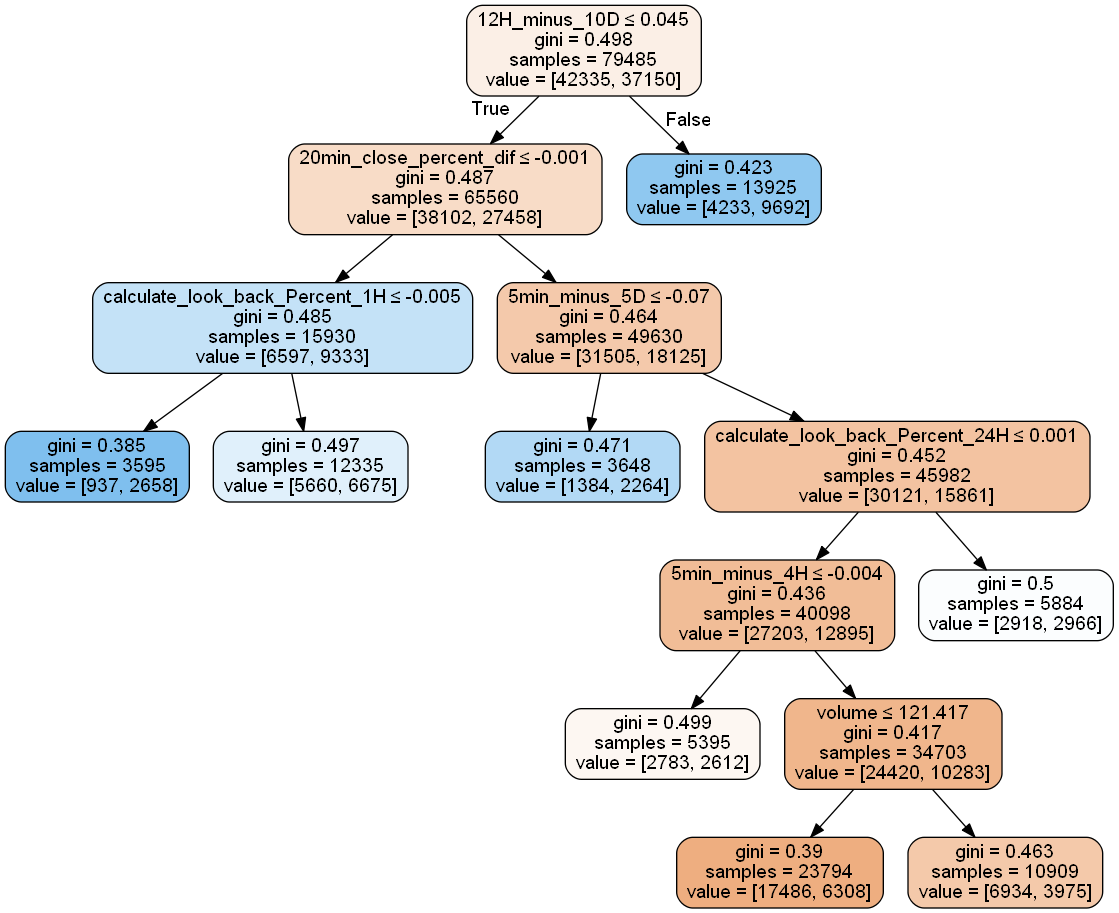

In [427]:
Image(graph.create_png())

In [428]:
## Testing theory

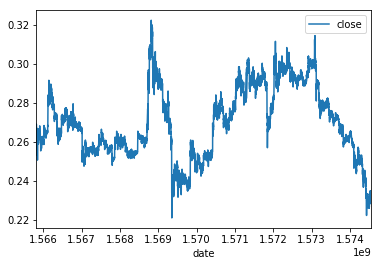

In [429]:
XRP_for_testing[['close','date']].set_index('date').plot()

In [430]:
section_period = {  '5min': 1,
                    '10min': 2,
                    '15min': 3,
                    '20min': 4,
                    '1H': 12,
                    '2H': 24,
                    '4H': 48,
                    '12H': 144,
                    '24H': 288,
                    '5D': 1440,
                    '10D': 2880}
# section_period = {'20min': 4,
# '1H': 12,
# '2H': 24,
# '4H': 48,
# '12H': 144,
# '24H': 288,
# '5D': 1440,
# '10D': 2880}

In [431]:
for k,v in section_period.items():
    XRP_for_testing['{0}_RA_on_Close'.format(k)] = XRP_for_testing['close'].rolling(v).mean()

In [432]:
compare_sequence = {}

In [433]:
for col_1 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    for col_2 in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
        temp_1 = col_1.split('_RA_on_Close')[0]
        temp_2 = col_2.split('_RA_on_Close')[0]
        if temp_1 != temp_2:
            if ((temp_1 + '_minus_' + temp_2) not in compare_sequence.keys() and (temp_2 + '_minus_' + temp_1) not in compare_sequence.keys() ):
                compare_sequence.update({temp_1 + '_minus_' + temp_2 : [col_1, col_2]})

In [434]:
for k, val in compare_sequence.items():
    XRP_for_testing[k] = (XRP_for_testing[val[0]] - XRP_for_testing[val[1]])/XRP_for_testing[val[1]] 
#     print(k, val[0], val[1])

In [435]:
for col in [d for d in XRP_for_testing.columns if '_RA_on_Close' in d]:
    XRP_for_testing[col] = XRP_for_testing[col].shift(1)
    
    XRP_for_testing['{0}_close_percent_dif'.format(col.split('_RA_on_Close')[0])] = (XRP_for_testing['close']-XRP_for_testing[col])/XRP_for_testing[col] 

In [436]:
for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['look_back_{}'.format(k)] = XRP_for_testing['close'].shift(v)   # i.e. 20min ago, this is what the close price is
#     XRP_for_testing['look_forward_{}'.format(k)] = XRP_for_testing['close'].shift(-v)  # i.e. 20min later, the close price is


for k,v in section_period.items():
    print(k,v)
    XRP_for_testing['calculate_look_back_Percent_{}'.format(k)]    = 100*(XRP_for_testing['close'] - XRP_for_testing['look_back_{}'.format(k)])/(5*v)
#     XRP_for_testing['calculate_look_forward_Percent_{}'.format(k)] =  100*(XRP_for_testing['look_forward_{}'.format(k)] - XRP_for_testing['close'])/(5*v)

5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880
5min 1
10min 2
15min 3
20min 4
1H 12
2H 24
4H 48
12H 144
24H 288
5D 1440
10D 2880


In [437]:
Counter(buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna()))

Counter({False: 16505, True: 9718})

In [438]:
XRP_for_testing_drop_na = XRP_for_testing.dropna()

In [439]:
XRP_for_testing_drop_na['Buy_from_decision_tree'] = buy_in_decision_classifier.predict(XRP_for_testing[properties].dropna())

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [486]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0

stop_loss_limit = 0.02

In [487]:
for ind, df in XRP_for_testing_drop_na.iterrows():
#         print(df['date'])

    if bought_crypto != True: # then looking to buy at drop limit or lower
        if df['Buy_from_decision_tree']: 
            "then buy crypto"

            XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

            gold_available -= gold_available

            time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})

            last_xrp_traction_price =  df['low']

            bought_crypto = True

            latest_bought_crypto_timestamp = df['date']

#                 print('last_xrp_traction_price ', last_xrp_traction_price)

    else:
        if bought_crypto: # has crypto, either wait or sell at stoploss or profit
            
            
                    

            if ( last_xrp_traction_price - df['close'] ) / last_xrp_traction_price <= -stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})

                bought_crypto = False

                        
            elif df['date'] - latest_bought_crypto_timestamp > 172800 * 5:

                gold_available += XRP_amount * df['low'] * 0.998  # sell at low price

                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})

                bought_crypto = False


            elif (df['high'] - last_xrp_traction_price)/df['high'] >= 0.005:

                gold_available += XRP_amount * df['high'] * 0.998  # sell at low price

                XRP_amount -= XRP_amount

                time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell' ,  df['low'])})

                bought_crypto = False
                
                
            else:
                pass

In [488]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

In [489]:
transation_log

,Gold,XRP_Amount,action,price_action_happened,datetime_real
1566697800,0.00,371.8453,brought,0.268391,2019-08-25 02:50:00
1566699600,100.20,0.0000,sell,0.269997,2019-08-25 03:20:00
1566703800,0.00,371.1061,brought,0.269454,2019-08-25 04:30:00
1566705300,100.52,0.0000,sell,0.271417,2019-08-25 04:55:00
1566713700,0.00,372.0388,brought,0.269655,2019-08-25 07:15:00
1566717900,101.40,0.0000,sell,0.271566,2019-08-25 08:25:00
1566718800,0.00,370.2122,brought,0.273362,2019-08-25 08:40:00
1566728100,101.67,0.0000,sell,0.274000,2019-08-25 11:15:00
1566728400,0.00,370.8342,brought,0.273625,2019-08-25 11:20:00
1566729600,101.84,0.0000,sell,0.275170,2019-08-25 11:40:00


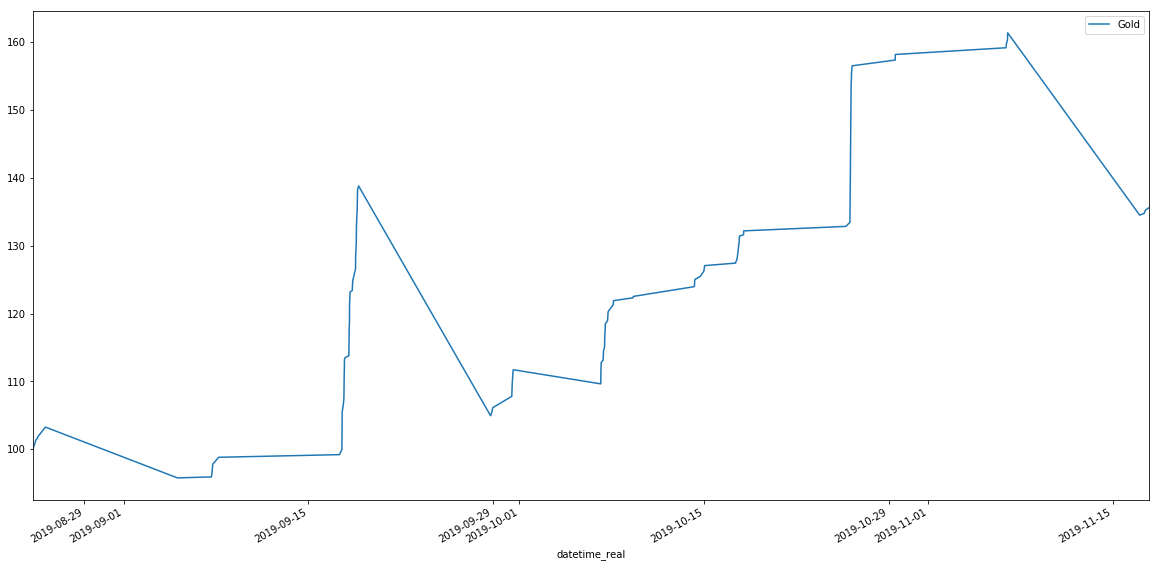

In [490]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['Gold']].plot(figsize = (20,10))

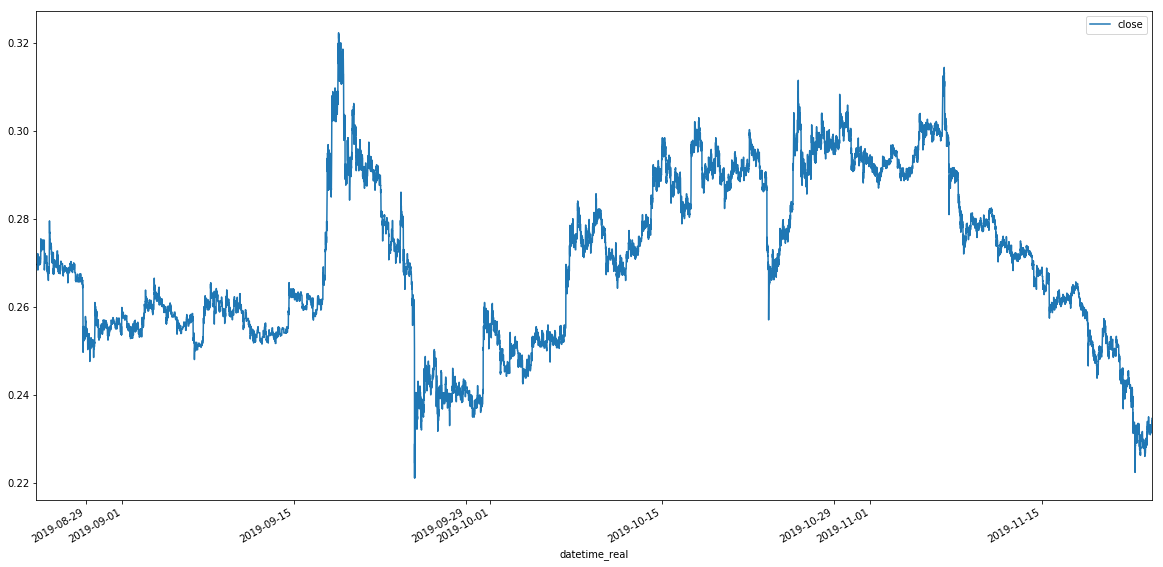

In [493]:
XRP_for_testing_drop_na.set_index('datetime_real')[['close']].plot(figsize = (20,10))

In [444]:
time_event = {}
starting_asset = 100
bought_crypto = False


gold_available = starting_asset 
XRP_amount = 0


drop_limit = 0.005 # used mean on this side, actual 0.004686, but decreased abit for optimistic view 

stop_loss_limit = 0.02
sell_limit = 0.005

trading_data = XRP_for_testing_drop_na
while gold_available >= 0:
    
    for ind, df in trading_data.iterrows():
#         print(df['date'])
        
        if bought_crypto != True: # then looking to buy at drop limit or lower
            if (( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= drop_limit ) and (df['20min_RA_on_Close'] != df['2H_RA_on_Close']): 
                "then buy crypto"

                XRP_amount += (gold_available/df['low']) * 0.998 # due to 0.2% fee

                gold_available -= gold_available
                
                time_event.update({df['date']  : ( gold_available, XRP_amount , 'brought' , df['low'])})
                
                last_xrp_traction_price =  df['low']
                
                bought_crypto = True
                
                latest_bought_crypto_timestamp = df['date']
                
#                 print('last_xrp_traction_price ', last_xrp_traction_price)
                
        else:
            if bought_crypto: # has crypto, either wait or sell at stoploss or profit
#                 print('hit_sell_limit',
#                       (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit ,
#                       round((df['high'] - last_xrp_traction_price),6) ,
#                       'sell_limit ', sell_limit
                     
#                       )

                if df['date'] - latest_bought_crypto_timestamp > 172800:
                    
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'time_stop' ,  df['low'])})
                    
                    bought_crypto = False
                    
                
                elif ( df['20min_RA_on_Close'] - df['low'] ) / df['20min_RA_on_Close'] >= stop_loss_limit: # then hit stop loss, force sell
#                     print('stoppppppppppppppppppppppppp')
                    gold_available += XRP_amount * df['low'] * 0.998  # sell at low price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'stop_loss_hit' ,  df['low'])})
                    
                    bought_crypto = False
                    
                    
                
                elif  (df['high'] - last_xrp_traction_price)/last_xrp_traction_price >= sell_limit: # then hit target price, sell for profit
                    
#                     print(last_xrp_traction_price)
                                        
                    gold_available += XRP_amount * df['high'] * 0.998  # sell at high price
                    
                    XRP_amount -= XRP_amount
                    
                    time_event.update({df['date']  : ( gold_available, XRP_amount , 'sell_profit' , df['high'])})
                    
                    bought_crypto = False

    break
                
else:
    print('Negative asset: bankrupt  ->>>   ',  gold_available)

In [445]:
transation_log = pd.DataFrame.from_dict(time_event, orient='index', columns= ['Gold', 'XRP_Amount', 'action', 'price_action_happened'])

transation_log['datetime_real'] = [datetime.fromtimestamp(d) for d in transation_log.index]

transation_log['Gold'] = round(transation_log['Gold'], 2)

transation_log['XRP_Amount'] = round(transation_log['XRP_Amount'], 4)

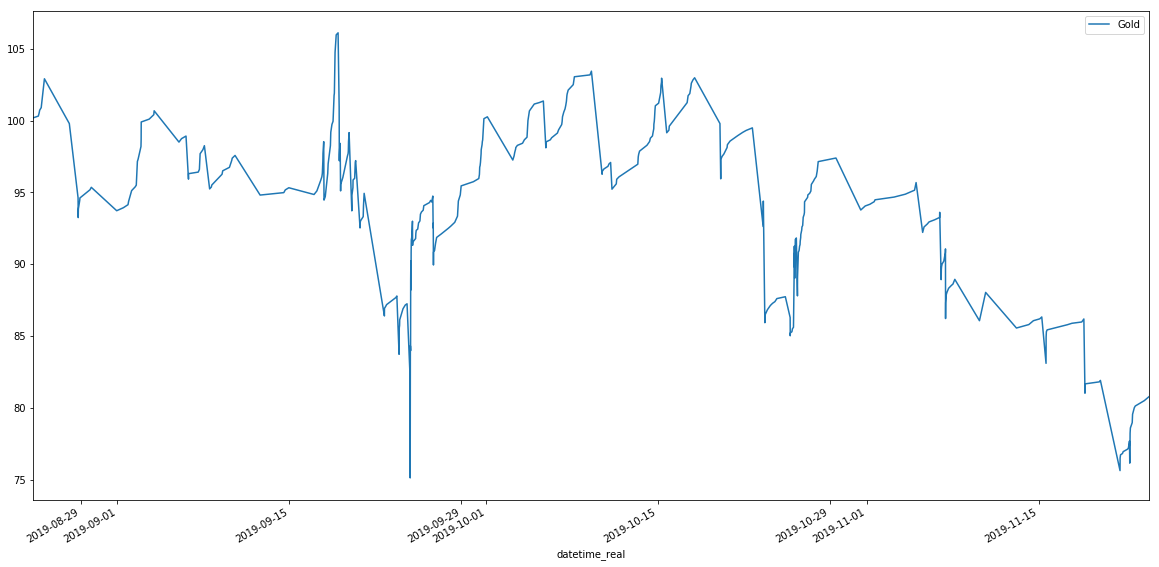

In [446]:
transation_log[transation_log['action'] != 'brought'].set_index('datetime_real')[['Gold']].plot(figsize = (20,10))

In [447]:
transation_log

,Gold,XRP_Amount,action,price_action_happened,datetime_real
1566697800,0.00,371.8453,brought,0.268391,2019-08-25 02:50:00
1566699600,100.20,0.0000,sell_profit,0.269997,2019-08-25 03:20:00
1566734400,0.00,366.2122,brought,0.273055,2019-08-25 13:00:00
1566735600,100.32,0.0000,sell_profit,0.274479,2019-08-25 13:20:00
1566738300,0.00,366.0261,brought,0.273522,2019-08-25 14:05:00
1566741000,100.52,0.0000,sell_profit,0.275180,2019-08-25 14:50:00
1566743100,0.00,373.2854,brought,0.268750,2019-08-25 15:25:00
1566745200,100.73,0.0000,sell_profit,0.270376,2019-08-25 16:00:00
1566749700,0.00,372.2890,brought,0.270017,2019-08-25 17:15:00
1566756000,100.91,0.0000,sell_profit,0.271594,2019-08-25 19:00:00


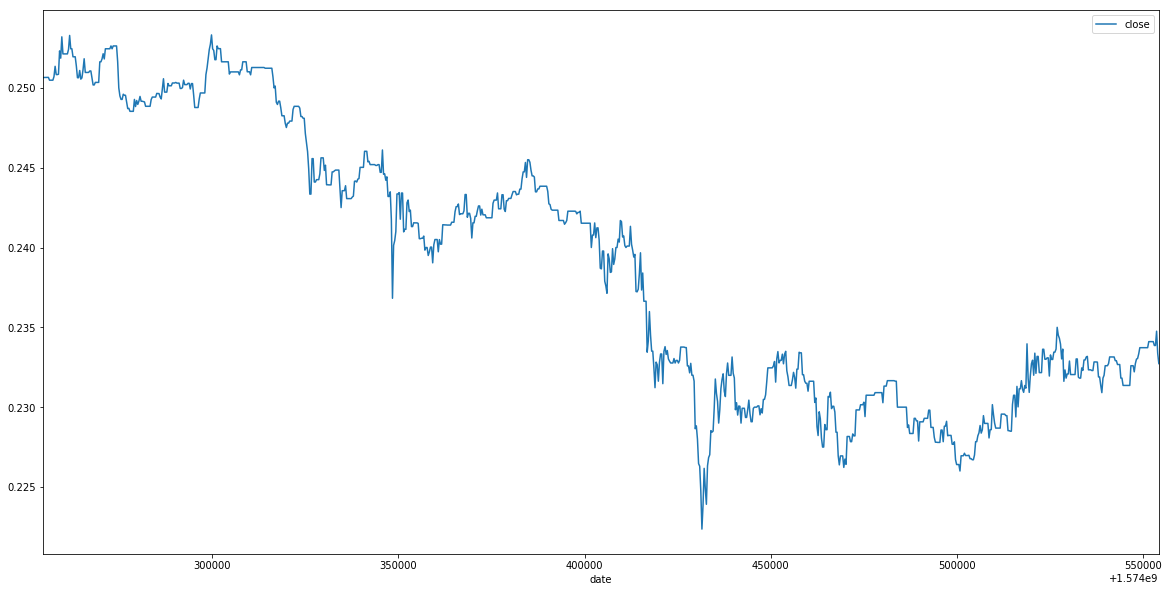

In [448]:
XRP_for_testing_drop_na.tail(1000).set_index('date')[['close']].plot(figsize = (20,10))

In [449]:
#last_few_days = XRP_for_testing_drop_na.tail(1000).copy()

# sharp drop bounce back

In [450]:
last_few_days.head()

,close,date,high,low,open,quoteVolume,volume,weightedAverage,datetime_real,20min_RA_on_Close,...,look_back_10D,calculate_look_back_Percent_20min,calculate_look_back_Percent_1H,calculate_look_back_Percent_2H,calculate_look_back_Percent_4H,calculate_look_back_Percent_12H,calculate_look_back_Percent_24H,calculate_look_back_Percent_5D,calculate_look_back_Percent_10D,Buy_from_decision_tree
21467,0.250637,1574254500,0.250637,0.250637,0.250637,121.470302,30.444902,0.250637,2019-11-20 12:55:00,0.250957,...,0.279206,0.001479,-0.001612,0.000712,0.000054,-0.000592,0.000419,-0.000235,-0.000198,False
21468,0.250650,1574254800,0.250650,0.250650,0.250650,4.176449,1.046829,0.250650,2019-11-20 13:00:00,0.251031,...,0.279206,-0.001382,-0.001424,0.001284,0.000060,-0.000670,0.000400,-0.000235,-0.000198,False
21469,0.250650,1574255100,0.250650,0.250650,0.250650,0.000000,0.000000,0.250650,2019-11-20 13:05:00,0.250962,...,0.279206,-0.001382,-0.002398,0.000723,0.000434,-0.000629,0.000424,-0.000236,-0.000198,False
21470,0.250656,1574255400,0.250656,0.250656,0.250656,2427.251131,608.404987,0.250656,2019-11-20 13:10:00,0.250893,...,0.279358,-0.004883,-0.002279,0.000728,0.000437,-0.000929,0.000376,-0.000226,-0.000199,False
21471,0.250656,1574255700,0.250656,0.250656,0.250656,0.000000,0.000000,0.250656,2019-11-20 13:15:00,0.250648,...,0.279358,0.000097,-0.002031,-0.000134,0.000437,-0.000816,0.000362,-0.000226,-0.000199,False


In [451]:
# Create some mock data
t = data_selection_section1[:8000]['level_0']

data1_sec1 = data_selection_section1[:8000]['1H_close_dif'].cumsum()/t
data1_sec2 = data_selection_section2[:8000]['1H_close_dif'].cumsum()/t
data1_sec3 = data_selection_section3[:8000]['1H_close_dif'].cumsum()/t
data1_sec4 = data_selection_section4[:8000]['1H_close_dif'].cumsum()/t

fig, ax1 = plt.subplots(figsize= (20,10))

color1 = 'tab:red'
color1_2 = 'tab:green'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('RSM')
ax1.plot(t[50:], data1_sec1[50:], alpha = 0.6, label = 'data1_sec1')
# ax1.plot(t[50:], data1_sec2[50:], alpha = 0.6, label = 'data1_sec2')
# ax1.plot(t[200:], data1_sec3[200:], alpha = 0.6, label = 'data1_sec3')
ax1.plot(t[50:], data1_sec4[50:], alpha = 0.6, label = 'data1_sec4')


ax1.axhline(0)

ax1.tick_params(axis='y')


# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis


# data2 = data_selection['close']
# color2 = 'tab:blue'
# ax2.set_ylabel('XRP', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)


## vertical lines
# ax1.axhline(y=0.0005)
# ax1.axhline(y=-0.0005)

ax1.axhline(y=0.0002)
ax1.axhline(y=-0.0002)



fig.tight_layout()  # otherwise the right y-label is slightly clipped

ax1.legend()
plt.show()

NameError: name 'data_selection_section1' is not defined